In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

In [5]:
# -------------------------
# 1. Charger le fichier Parquet traité
# Nécessite d'avoir lancé le pipeline au moins une fois
# -------------------------
processed_dir = Path("../data/processed")
latest_file = max(processed_dir.glob("*.parquet"), key=lambda f: f.stat().st_mtime)

df = pd.read_parquet(latest_file)
print(f"Fichier chargé : {latest_file.name}")
print(f"Nombre de lignes : {len(df)}, nombre de colonnes : {len(df.columns)}")

# Aperçu des premières lignes
df.head()

Fichier chargé : orange juice_20251216_165754.parquet
Nombre de lignes : 500, nombre de colonnes : 19


,brands,categories,code,energy_100g,fat_100g,nova_group,nutriscore_grade,product_name,salt_100g,stores,sugars_100g,store_address,latitude,longitude,city,postal_code,geocoding_score,sugar_category,is_geocoded
0,coca-cola company,"aliments et boissons à base de végétaux,boisso...",90382383,155.0,0.0,4.0,e,Cappy pulpy,0.0500,,7.0,unknown,47.634449,-2.823204,unknown,unknown,0.946655,modéré,True
1,jaouda,"plant-based foods and beverages, beverages, pl...",6111242104198,155.0,0.0,4.0,b,PRESSup ORANGE 1L,0.0025,Marjane,4.5,unknown,47.634449,-2.823204,unknown,unknown,0.946655,faible,True
2,unknown,"beverages and beverages preparations, plant-ba...",6111242107380,226.0,0.1,4.0,c,Press up,0.0025,unknown,5.5,unknown,47.634449,-2.823204,unknown,unknown,0.946655,modéré,True
3,tropicana,"plant-based foods and beverages, beverages, pl...",3502110009449,182.0,0.0,1.0,c,Orangensaft,0.0000,"Magasins U,Carefour Market,Carefour",8.9,unknown,47.634449,-2.823204,unknown,unknown,0.946655,modéré,True
4,don simón,"alimentos y bebidas de origen vegetal, bebidas...",8410261643014,84.0,0.1,4.0,d,Simon life,0.0300,,4.8,unknown,47.634449,-2.823204,unknown,unknown,0.946655,faible,True


In [6]:
# -------------------------
# 2. Aperçu global des colonnes
# -------------------------
df.info()
df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   brands            500 non-null    object  
 1   categories        500 non-null    object  
 2   code              500 non-null    object  
 3   energy_100g       500 non-null    float64 
 4   fat_100g          500 non-null    float64 
 5   nova_group        500 non-null    float64 
 6   nutriscore_grade  500 non-null    object  
 7   product_name      500 non-null    object  
 8   salt_100g         500 non-null    float64 
 9   stores            500 non-null    object  
 10  sugars_100g       500 non-null    float64 
 11  store_address     500 non-null    object  
 12  latitude          500 non-null    float64 
 13  longitude         500 non-null    float64 
 14  city              500 non-null    object  
 15  postal_code       500 non-null    object  
 16  geocoding_score   500 non-

,brands,categories,code,energy_100g,fat_100g,nova_group,nutriscore_grade,product_name,salt_100g,stores,sugars_100g,store_address,latitude,longitude,city,postal_code,geocoding_score,sugar_category,is_geocoded
count,500,500,500,500.000000,500.000000,500.000000,500,500,500.000000,500,500.000000,500,500.000000,500.000000,500,500,500.000000,497,500
unique,194,232,500,NaN,NaN,NaN,5,380,NaN,122,NaN,5,NaN,NaN,5,5,NaN,4,1
top,solevita,"aliments et boissons à base de végétaux, boiss...",90382383,NaN,NaN,NaN,c,Orangensaft,NaN,,NaN,unknown,NaN,NaN,unknown,unknown,NaN,modéré,True
freq,29,52,1,NaN,NaN,NaN,354,20,NaN,131,NaN,488,NaN,NaN,488,488,NaN,473,500
mean,NaN,NaN,NaN,178.881000,0.207439,1.226000,NaN,NaN,0.019153,NaN,8.999163,NaN,47.621574,-2.796649,NaN,NaN,0.944974,NaN,NaN
std,NaN,NaN,NaN,77.213802,0.512742,0.782399,NaN,NaN,0.126912,NaN,4.082281,NaN,0.253703,0.354204,NaN,NaN,0.021709,NaN,NaN
min,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN,0.000000,NaN,0.000000,NaN,43.340641,-2.823204,NaN,NaN,0.640459,NaN,NaN
25%,NaN,NaN,NaN,167.000000,0.000000,1.000000,NaN,NaN,0.000000,NaN,8.600000,NaN,47.634449,-2.823204,NaN,NaN,0.946655,NaN,NaN
50%,NaN,NaN,NaN,179.000000,0.100000,1.000000,NaN,NaN,0.005000,NaN,9.000000,NaN,47.634449,-2.823204,NaN,NaN,0.946655,NaN,NaN
75%,NaN,NaN,NaN,187.000000,0.500000,1.000000,NaN,NaN,0.010000,NaN,9.300000,NaN,47.634449,-2.823204,NaN,NaN,0.946655,NaN,NaN


In [7]:
# -------------------------
# 3. Vérifier les colonnes dérivées
# -------------------------
if "sugar_category" in df.columns:
    print("Distribution de sugar_category :")
    print(df["sugar_category"].value_counts())

if "is_geocoded" in df.columns:
    print("Nombre de produits géocodés :", df["is_geocoded"].sum())


Distribution de sugar_category :
sugar_category
modéré        473
faible         20
élevé           2
très_élevé      2
Name: count, dtype: int64
Nombre de produits géocodés : 500


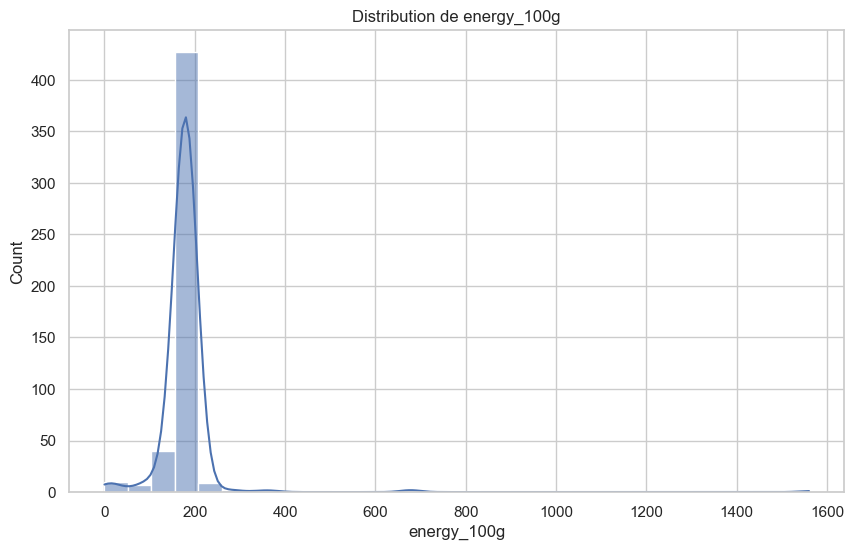

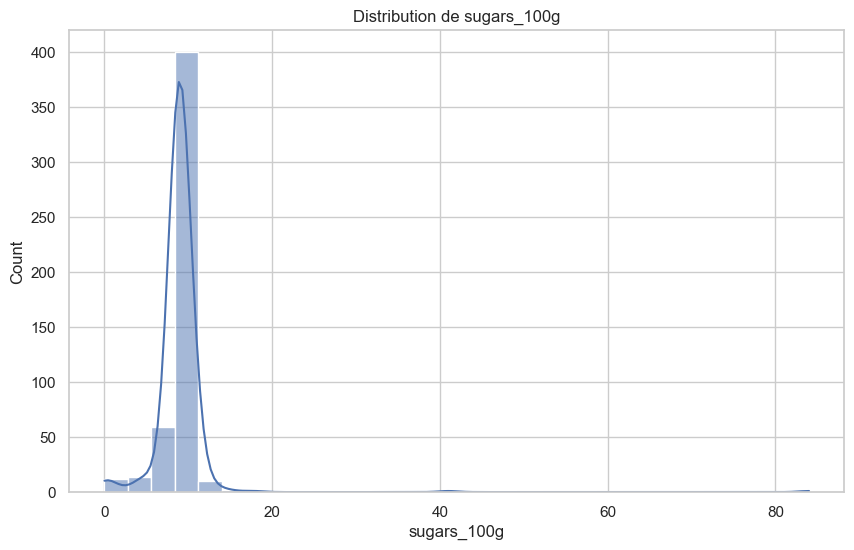

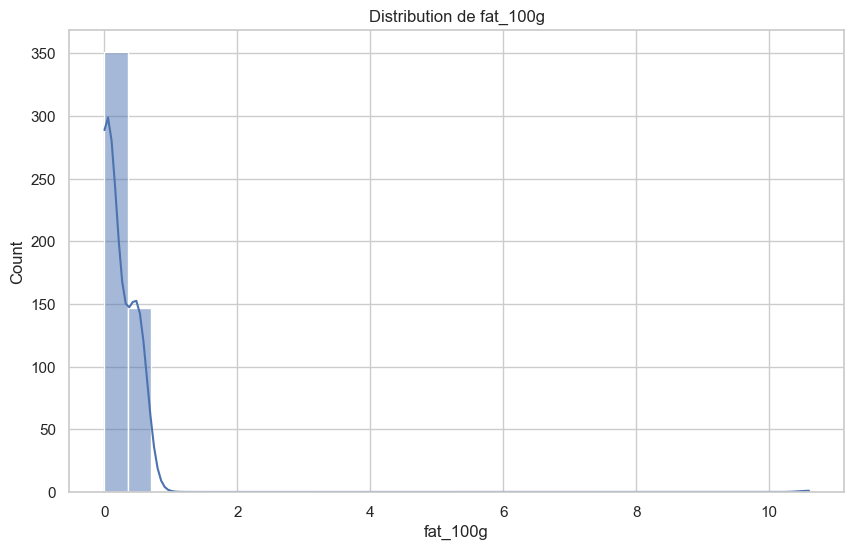

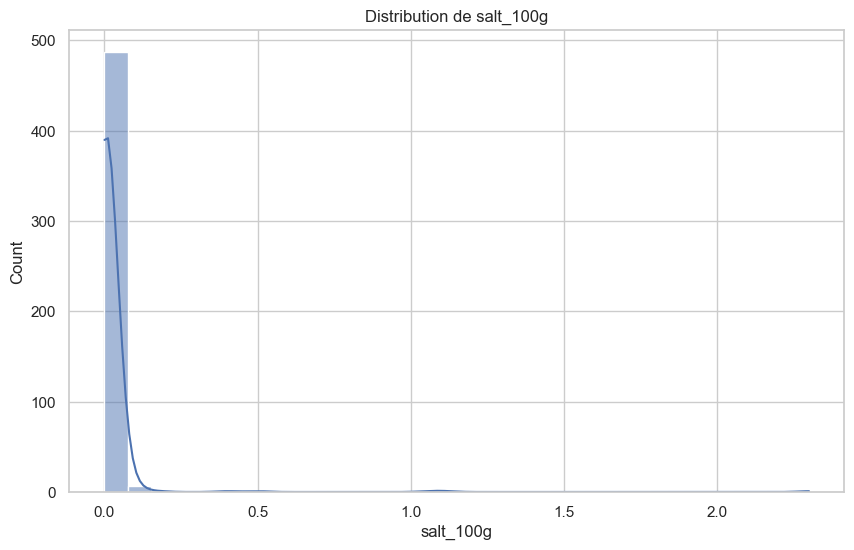

In [8]:
# -------------------------
# 4. Distribution des valeurs nutritionnelles
# -------------------------
numeric_cols = ["energy_100g", "sugars_100g", "fat_100g", "salt_100g"]
for col in numeric_cols:
    if col in df.columns:
        sns.histplot(df[col].dropna(), bins=30, kde=True)
        plt.title(f"Distribution de {col}")
        plt.show()

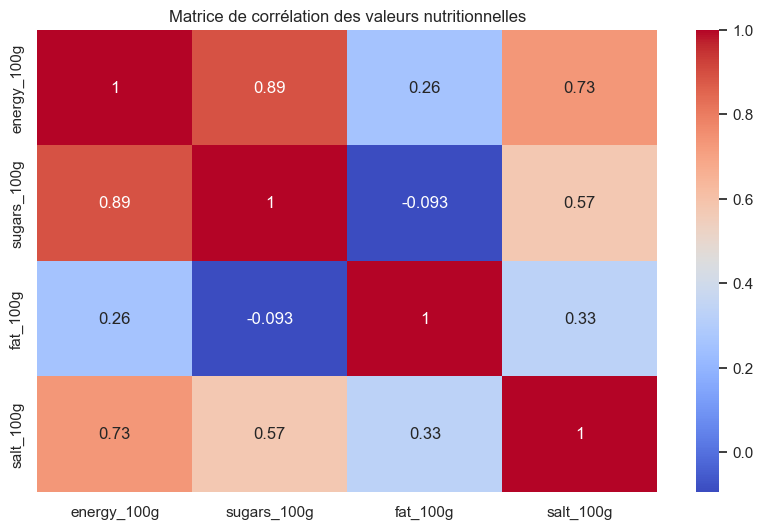

In [9]:
# -------------------------
# 5. Corrélation
# -------------------------
num_df = df[numeric_cols].copy().apply(pd.to_numeric, errors='coerce')
sns.heatmap(num_df.corr(), annot=True, cmap="coolwarm")
plt.title("Matrice de corrélation des valeurs nutritionnelles")
plt.show()

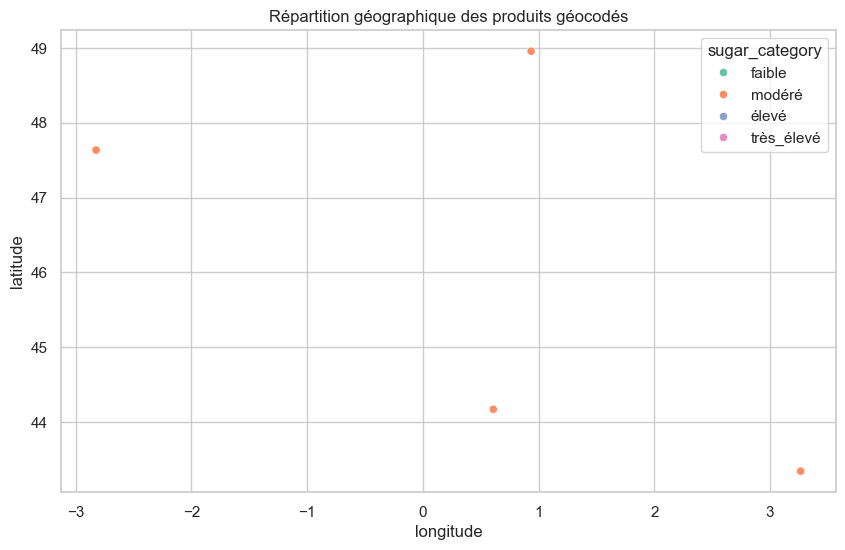

In [10]:
# -------------------------
# 6. Analyse géographique
# -------------------------
if {"latitude", "longitude"}.issubset(df.columns):
    sns.scatterplot(
        x="longitude", y="latitude",
        data=df[df["is_geocoded"]==1],
        hue="sugar_category",
        palette="Set2"
    )
    plt.title("Répartition géographique des produits géocodés")
    plt.show()

In [11]:
# -------------------------
# 7. Top catégories / marque
# -------------------------
for col in ["categories", "brands"]:
    if col in df.columns:
        print(f"Top 10 {col}:")
        print(df[col].value_counts().head(10))

Top 10 categories:
categories
aliments et boissons à base de végétaux, boissons, boissons à base de végétaux, boissons aux fruits, jus et nectars, jus de fruits, jus d'orange, jus de fruits pur jus, jus d'orange pur jus                                      52
plant-based foods and beverages, beverages, plant-based beverages, fruit-based beverages, juices and nectars, fruit juices, orange juices                                                                                          40
aliments et boissons à base de végétaux, boissons, boissons à base de végétaux, boissons aux fruits, jus et nectars, jus de fruits, jus d'orange                                                                                   19
aliments et boissons à base de végétaux, boissons, boissons à base de végétaux, boissons aux fruits, jus et nectars, jus de fruits, jus de fruits à base de concentré, jus d'orange, jus d'orange à base de concentré              17
en:orange-juices                                  